In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
X_train.shape

(426, 30)

In [3]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=100)
model_lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
print("Genauigkeit auf den Trainingsdaten: {:.3f}".format(model_lr.score(X_train, y_train)))
print("Genauigkeit auf den Testdaten: {:.3f}".format(model_lr.score(X_test, y_test)))

Genauigkeit auf den Trainingsdaten: 0.967
Genauigkeit auf den Testdaten: 0.965


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_test_pca.shape: {}".format(X_test_pca.shape))

X_test_pca.shape: (143, 2)


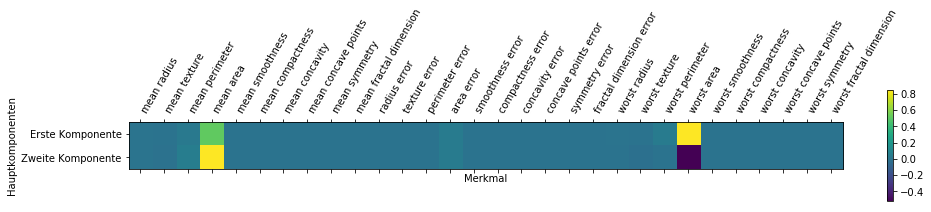

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["Erste Komponente", "Zweite Komponente"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=60, ha="left")
plt.xlabel("Merkmal")
plt.ylabel("Hauptkomponenten")

In [9]:
model_lr.fit(X_train_pca, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
print("Genauigkeit auf den Trainingsdaten: {:.3f}".format(model_lr.score(X_train_pca, y_train)))
print("Genauigkeit auf den Testdaten: {:.3f}".format(model_lr.score(X_test_pca, y_test)))

Genauigkeit auf den Trainingsdaten: 0.932
Genauigkeit auf den Testdaten: 0.937
